# $k,c_v$をインタラクティブにグラフに描画

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


n=100
a=0
t=100
m=1
#k=1
#c_v=2
g=9.8
x_0=15
@interact(k=(0,5.0),c_v=(0,5.0))
def show_graph(k,c_v):
    print(c_v**2-4*k)

#dx/dt
    def f_1(x, u):
        return u

    #du/dt
    def f_2(x, u):
        return -g-k*x/m-c_v*u/m


    def solve_oed_runge_kutta(a, b, f_1, f_2, n, u_a, v_a):
        dt = (b - a) / n
        t = [a + i * dt for i in range(n + 1)]
        u = np.zeros(n + 1)
        v = np.zeros(n + 1)

        u[0] = u_a
        v[0] = v_a

        for i in range(n):
            k_1 = f_1(u[i], v[i])
            l_1 = f_2(u[i], v[i])

            k_2 = f_1(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)
            l_2 = f_2(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)

            k_3 = f_1(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)
            l_3 = f_2(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)

            k_4 = f_1(u[i] + dt * k_3, v[i] + dt * l_3)
            l_4 = f_2(u[i] + dt * k_3, v[i] + dt * l_3)
            u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
            v[i + 1] = v[i] + (1 / 6) * dt * (l_1 + 2 * (l_2 + l_3) + l_4)

        return (u, v)

    x,u=solve_oed_runge_kutta(a,t,f_1,f_2,n,x_0-m*g/k,0)
    t_axis=np.linspace(0,t,n+1)
    plt.plot(t_axis,x)
    #plt.plot(t_axis,u)
    plt.show()


interactive(children=(FloatSlider(value=2.5, description='k', max=5.0), FloatSlider(value=2.5, description='c_…

# 課題のグラフ

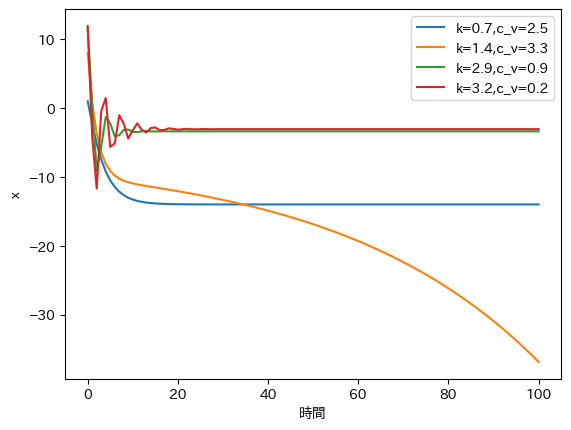

In [4]:
import japanize_matplotlib

k_list=[0.70,1.40,2.90,3.20]
c_v_list=[2.50,3.30,0.90,0.20]

for i in range(len(k_list)):

    # dx/dt
    def f_1(x, u):
        return u



    # du/dt
    #k=0.4,c_v=2
    def f_2(x, u):
        return -g - k_list[i] * x / m - c_v_list[i] * u / m



    def solve_oed_runge_kutta(a, b, f_1, f_2, n, u_a, v_a):
        dt = (b - a) / n
        t = [a + i * dt for i in range(n + 1)]
        u = np.zeros(n + 1)
        v = np.zeros(n + 1)

        u[0] = u_a
        v[0] = v_a

        for i in range(n):
            k_1 = f_1(u[i], v[i])
            l_1 = f_2(u[i], v[i])

            k_2 = f_1(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)
            l_2 = f_2(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)

            k_3 = f_1(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)
            l_3 = f_2(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)

            k_4 = f_1(u[i] + dt * k_3, v[i] + dt * l_3)
            l_4 = f_2(u[i] + dt * k_3, v[i] + dt * l_3)
            u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
            v[i + 1] = v[i] + (1 / 6) * dt * (l_1 + 2 * (l_2 + l_3) + l_4)

        return (u, v)


    x, u = solve_oed_runge_kutta(a, t, f_1, f_2, n, x_0 - m * g / k_list[i], 0)
    t_axis=np.linspace(0,t,n+1)
    plt.plot(t_axis,x,label="k={},c_v={}".format(k_list[i],c_v_list[i]))

plt.legend()
plt.xlabel("時間")
plt.ylabel("x")
plt.savefig("1SC22317Y04a02.pdf")
plt.show()
